# Data

The provided dataset contains multiple spots in the histology images of several tissues and the labels of these spots.

The code below shows how you can load and use the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os


Mounted at /content/drive


In [2]:
os.chdir('/content/drive/MyDrive/her2_analysis')

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

def load_her2():
    X = []
    for i in range(7):
        X.append(pkl.load(open('data/X%d.pkl' % (i), 'rb')))
        y = pkl.load(open('data/y%d.pkl' % (i), 'rb'))
    return X, y

In [4]:
X, y = load_her2()

7 tissues
346 spots in the first tissue
Label for the first spot in the first tissue: 0
Image for the first spot in the first tissue
[[[227 202 224]
  [225 199 224]
  [225 201 225]
  ...
  [171 153 195]
  [178 160 202]
  [186 161 200]]

 [[227 202 224]
  [226 200 225]
  [225 200 222]
  ...
  [180 162 204]
  [185 163 201]
  [190 168 204]]

 [[227 202 224]
  [225 199 224]
  [227 199 224]
  ...
  [186 160 207]
  [192 171 204]
  [194 169 199]]

 ...

 [[226 200 225]
  [225 202 228]
  [227 205 228]
  ...
  [111 112 166]
  [117 117 171]
  [130 127 184]]

 [[225 199 224]
  [224 198 225]
  [225 202 228]
  ...
  [103 103 157]
  [111 111 165]
  [122 122 174]]

 [[227 198 226]
  [224 198 225]
  [224 199 228]
  ...
  [110 103 157]
  [111 105 153]
  [113 115 164]]]


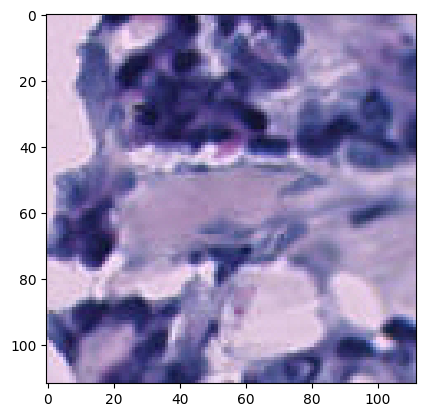

In [5]:
print(len(X), 'tissues')
print(len(X[0]), 'spots in the first tissue')
print('Label for the first spot in the first tissue:', y[0][0])
print('Image for the first spot in the first tissue')
img = np.transpose(X[0][0], [1, 2, 0])
plt.imshow(img)
print(img)

0


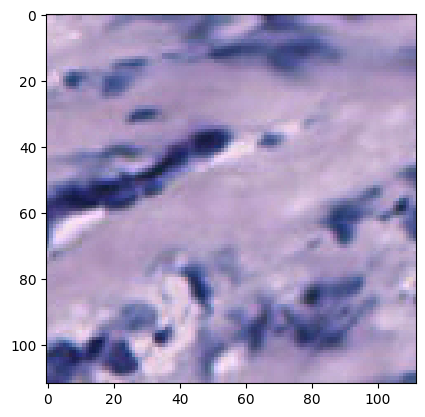

In [6]:
print(y[0][1])
img = np.transpose(X[0][1], [1, 2, 0])
plt.imshow(img)

[1668, 58, 229, 41, 448, 183, 241] 2868


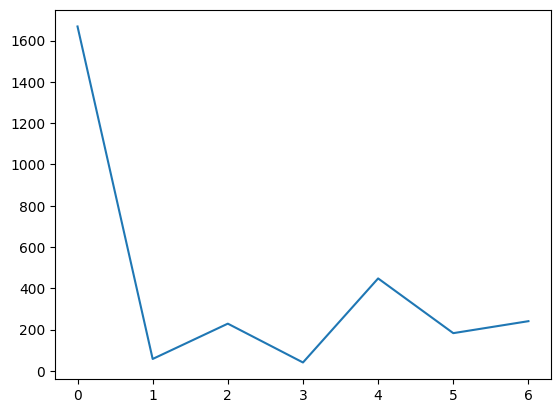

In [7]:
count=0
dist=[0,0,0,0,0,0,0]
for i in y:
    for j in i:
        dist[j]+=1
        count+=1
count
X
print(dist,count)
import matplotlib.pyplot as plt
plt.plot(dist)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/her2_analysis')
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalMaxPooling2D, BatchNormalization,  Dropout, RandomCrop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as pltn
import torch
import tensorflow as tf
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
import torch.nn.functional as F
import pandas as pd
import argparse
import os
import random
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.utils as vutils

# import Sklearn_PyTorch

Mounted at /content/drive


In [2]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# # dataset): unsupervised feature extraction / dimensionality reduction

# # Center data

In [3]:
# X_train[0]

In [4]:
# !pwd
# print(len(X),len(X[0]),len(X[0][0]))

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming X is your array of images
# os.chdir('/home/Student/s4737925/Nan/her2_analysis/data/images')
# # Iterate through each image in X
# for i in range(len(X)):
#     print(i)
#     for j in range(len(X[i])):
#         print(i,j)
#         img = np.transpose(X[i][j], [1, 2, 0])
#         plt.imshow(img)  # Plot the image
#         plt.axis('off')
#         k=y[i][j]
#         os.chdir(f'/home/Student/s4737925/Nan/her2_analysis/data/images/{k}')
#         plt.savefig(f'image_{i}_{j}.png')  # Save the plotted image
#         plt.close()
# os.chdir('/home/Student/s4737925/Nan/her2_analysis')
# # Close any open plots

In [6]:
import os

def count_files(directory):
    if os.path.exists(directory) and os.path.isdir(directory):
        files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
        num_files = len(files)
        return num_files
    else:
        return "Directory does not exist or is not a valid directory."

# Replace '/path/to/directory' with the path of your directory
directory_path = '/content/drive/MyDrive/her2_analysis/data/images1/0'
num_files = count_files(directory_path)
print(f"Number of files in '{directory_path}': {num_files}")


Number of files in '/content/drive/MyDrive/her2_analysis/data/images1/0': 1167


In [7]:
# import os
# import shutil
# import random
# from math import ceil

# # Source directory
# source_dir = '/content/drive/MyDrive/her2_analysis/data/images1/'

# # Destination directory for test data
# test_dir = '/content/drive/MyDrive/her2_analysis/data/test1/'

# # Function to move a percentage of files from source to destination
# def move_percentage_files(src, dst, percentage):
#     files = os.listdir(src)
#     num_files_to_move = ceil(len(files) * percentage)
#     files_to_move = random.sample(files, num_files_to_move)
#     for file in files_to_move:
#         src_file = os.path.join(src, file)
#         dst_file = os.path.join(dst, file)
#         shutil.move(src_file, dst_file)

# # Iterate through subdirectories
# for subdir in os.listdir(source_dir):
#     subdir_path = os.path.join(source_dir, subdir)
#     if os.path.isdir(subdir_path):
#         test_subdir = os.path.join(test_dir, subdir)
#         os.makedirs(test_subdir, exist_ok=True)
#         move_percentage_files(subdir_path, test_subdir, 0.3)


# Neural Network

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
import numpy as np
import torch.nn.functional as F
from torch.amp import autocast

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if not torch.cuda.is_available():
    print("Warning CUDA not Found. Using CPU")

# High learning rate
# High test batch size
# Low Epoch - 67703 (34) - N
# Batch Size - 67702 (96) - N
# Weight decay - 67703 (4e-4) - O
# Weight decay - 67787 (6e-4) - O

# num_epochs = 36
# learning_rate = 0.06
num_classes=7
num_epochs = 200
learning_rate = 0.06
size=256


# transform_train = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914,0.4822,0.4465), (0.2023,0.1994,0.2010)),transforms.RandomHorizontalFlip(),transforms.RandomCrop(32, padding=4,padding_mode='reflect')])

# transform_test = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914,0.4822,0.4465), (0.2023,0.1994,0.2010))])


# trainset=torchvision.datasets.CIFAR10(root="/", train=True, download=True, transform=transform_train)
# train_loader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True, num_workers=3, pin_memory=True)

# testset=torchvision.datasets.CIFAR10(root="/", train=False, download=True, transform=transform_test)
# test_loader=torch.utils.data.DataLoader(testset,batch_size=256,shuffle=False, num_workers=3, pin_memory=True)

# Define transformations to apply to the images
transform_train = transforms.Compose([
    transforms.Resize((size, size)),  # Resize images to a consistent size  ############################
    transforms.ToTensor()      # Convert images to PyTorch tensors
    ,transforms.RandomHorizontalFlip(),transforms.RandomCrop(size,padding_mode='reflect')])
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
transform = transforms.Compose([
    transforms.Resize((size, size)),  # Resize images to a consistent size  ############################
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Path to your dataset containing subdirectories for each class
data_dir = '/content/drive/MyDrive/her2_analysis/data/images1/'
data_dir_test = '/content/drive/MyDrive/her2_analysis/data/test1/'
# Load the dataset using ImageFolder and apply transformations
dataset_train = datasets.ImageFolder(root=data_dir, transform=transform_train)
dataset_test = datasets.ImageFolder(root=data_dir_test, transform=transform)

# Split the dataset into training, validation, and test sets
total_len = len(dataset_test)
#train_len = int(0.7 * total_len)  # 70% for training
valid_len = int(0.5 * total_len)  # 15% for validation
test_len = total_len - valid_len  # Remaining for testing

valid_set, test_set = torch.utils.data.random_split(dataset_test, [valid_len, test_len])
train_set=dataset_train
# train_set, test_set = torch.utils.data.random_split(
#     dataset, [train_len, test_len])

# Create data loaders for training, validation, and test sets
train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32, num_workers=2, pin_memory=True)

In [9]:
print(len(train_loader),len(dataset_train),len(test_loader))

63 2004 14


In [10]:
# class BasicBlock(nn.Module):
#     expansion = 1

#     def __init__(self, in_planes, planes, stride=1):
#         super(BasicBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)

#         self.shortcut = nn.Sequential()
#         if stride != 1 or in_planes != self.expansion*planes:
#             self.shortcut = nn.Sequential(
#                 nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(self.expansion*planes)
#             )

#     def forward(self, x):
#         ## Forward Propagation is the way to move from the Input layer (left) to the Output layer (right) in the neural network.
#         ## The process of moving from the right to left i.e backward from the Output to the Input layer is called the Backward Propagation.
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.bn2(self.conv2(out))
#         out += self.shortcut(x)
#         out = F.relu(out)
#         return out


# class ResNet(nn.Module):
#     def __init__(self, block, num_blocks, num_classes=7):
#         super(ResNet, self).__init__()
#         self.in_planes = 64

#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(64) ## Normalization helps get data within a range and reduces the skewness which helps learn faster and better.
#         ## Normalization can also tackle the diminishing and exploding gradients problems.
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
#         self.linear = nn.Linear(512*block.expansion, num_classes) ## Applies a linear transformation to the incoming data: y = x*W^T + b

#     def _make_layer(self, block, planes, num_blocks, stride):
#         strides = [stride] + [1]*(num_blocks-1)
#         layers = []
#         for stride in strides:
#             layers.append(block(self.in_planes, planes, stride))
#             self.in_planes = planes * block.expansion
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.layer1(out)
#         out = self.layer2(out)
#         out = self.layer3(out)
#         out = self.layer4(out)
#         out = F.avg_pool2d(out, 4)
#         out = out.view(out.size(0), -1)
#         out = self.linear(out)
#         return out

# def Resnet18():
#     return ResNet(BasicBlock, [2, 2, 2, 2])


# model = Resnet18()
# model=model.to(device)

# #model info
# print("Model No. of Parameters:", sum([param.nelement() for param in model.parameters()]))
# print(model)


In [11]:
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=7):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, size//8)  # Adjust pooling based on the new input size (64x64)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def Resnet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

model = Resnet18()
model = model.to(device)

# model info
print("Model No. of Parameters:", sum([param.nelement() for param in model.parameters()]))
print(model)


Model No. of Parameters: 11172423
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64

In [12]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# # Define the neural network model
# class SimpleNet(nn.Module):
#     def __init__(self, num_classes):
#         super(SimpleNet, self).__init__()
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(786432,32)  # Input size: 512x512, Output size: 128
#         self.fc2 = nn.Linear(32, num_classes)  # Output size: num_classes (for classification)

#     def forward(self, x):
#         x = self.flatten(x)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.softmax(x, dim=1)  # Softmax activation for classification

# # Instantiate the model
# num_classes = 7  # Replace this with the actual number of classes
# model = SimpleNet(num_classes)

# # Print the model architecture
# model=model.to(device)
# print(model)



In [ ]:


##################################################################################################################################################################
##################################################################################################################################################################
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=6e-4)
p=[]
l=[]
total_step = len(train_loader)
scheduler=torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=learning_rate,steps_per_epoch=total_step, epochs=num_epochs)

scaler = torch.cuda.amp.GradScaler()

# Train the model
model.train()
print("> Training")
start = time.time()  # time generation
for epoch in range(num_epochs):
    br = None
    model.train()
    for i, (images, labels) in enumerate(train_loader):  # load a batch
        #print(images)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        #################### We go forward and calculate the weights
        with autocast(device_type="cuda" if torch.cuda.is_available() else "cpu"):
          ## autocast serve as context managers that allow regions of your script to run in mixed precision.
          ## In these regions, CUDA ops run in a dtype chosen by autocast to improve performance while maintaining accuracy.
            #print(images.shape)
            outputs = model(images)
            loss = criterion(outputs, labels)

        # Backward and optimize
        ###################### We now go back and optimise the values
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        br = loss.item()
        #if (i + 1) % 100 == 0:
        if total_step == 63: l.append(loss.item())
        print("Epoch [{}/{}], Step [{}/{}] Loss: {:.5f}".format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        scheduler.step()
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        p.append(100 * correct / total)
        print('Valid Accuracy: {} %'.format(100 * correct / total))
end = time.time()
elapsed = end - start
print("Training took " + str(elapsed) + " secs or " + str(elapsed / 60) + " mins in total")
###############################################################################################################################################################
# Test the model
print("> Testing")
start = time.time() #time generation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy: {} %'.format(100 * correct / total))
end = time.time()
elapsed = end - start
print("Testing took " + str(elapsed) + " secs or " + str(elapsed/60) + " mins in total")

print('END')

Streaming output truncated to the last 5000 lines.
Epoch [49/200], Step [63/63] Loss: 0.65650
Valid Accuracy: 59.9537037037037 %
Epoch [50/200], Step [1/63] Loss: 0.83803
Epoch [50/200], Step [2/63] Loss: 0.73425
Epoch [50/200], Step [3/63] Loss: 0.79752
Epoch [50/200], Step [4/63] Loss: 0.56100
Epoch [50/200], Step [5/63] Loss: 0.64292
Epoch [50/200], Step [6/63] Loss: 0.72693
Epoch [50/200], Step [7/63] Loss: 0.87911
Epoch [50/200], Step [8/63] Loss: 0.53134
Epoch [50/200], Step [9/63] Loss: 0.71768
Epoch [50/200], Step [10/63] Loss: 0.91788
Epoch [50/200], Step [11/63] Loss: 0.65660
Epoch [50/200], Step [12/63] Loss: 1.36565
Epoch [50/200], Step [13/63] Loss: 0.83509
Epoch [50/200], Step [14/63] Loss: 0.72309
Epoch [50/200], Step [15/63] Loss: 0.65283
Epoch [50/200], Step [16/63] Loss: 0.64244
Epoch [50/200], Step [17/63] Loss: 0.69419
Epoch [50/200], Step [18/63] Loss: 0.78636
Epoch [50/200], Step [19/63] Loss: 0.88811
Epoch [50/200], Step [20/63] Loss: 1.00285
Epoch [50/200], Step

In [ ]:
import matplotlib.pyplot as plt
plt.plot(p)
plt.show()
print(len(p))

# Random Forest

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X.
# X_train = X_train[:, :, :, np.newaxis]
# X_test = X_test[:, :, :, np.newaxis]
# print("X_train shape:", X_train.shape)
# X_train = tf.cast(X_train, tf.float32)
# X_test = tf.cast(X_test, tf.float32)
# #categorical one hot
# y_train_cat = to_categorical(y_train, categories)
# y_test_cat = to_categorical(y_test, categories)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train_cat.shape)
# print(y_test_cat.shape)

In [ ]:
# model.fit(X_train, y_train_cat,
#                 epochs=epochs,
#                 batch_size=batch_size,
#                 shuffle=True,
#                 validation_data=(X_test, y_test_cat))

# # classify the digits using the trained model
# # note that we take them from the *test* set
# predictions = model.predict(X_test)

# #reverse one-hot encoding
# predictions = np.argmax(predictions, axis=1)
# ########################################################################################
# correct = predictions==y_test.numpy()
# total_test = len(X_test_transformed)
# #print("Gnd Truth:", y_test)
# print("Total Testing", total_test)
# print("Predictions", predictions)
# print("Which Correct:",correct)
# print("Total Correct:",np.sum(correct))
# print("Accuracy:",np.sum(correct)/total_test)
# print(classification_report(y_test, predictions, target_names=target_names))